In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file stored in dataset folder using pandas

names = ['Pregnancies','Glucose','BP', 'SkinThickness' ,'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
pima = pd.read_csv('datasets/pima_indians.csv', names =names)

In [3]:
#Collecting Basic Information about the Data
pima.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.tail()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
pima.shape

(768, 9)

In [6]:
pima.info()
#It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BP                768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Handling the missing values
pima.isnull().values.any()

False

In [9]:
#It shows there are no null values
#Encoding 0 values with NaN
d = pima[['Glucose','BP','SkinThickness','Insulin','BMI']] = pima[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
d.head()


,Glucose,BP,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [10]:
#Find the number of missing value
d.isnull().sum()[['Glucose','BP','SkinThickness','Insulin','BMI']]

Glucose            5
BP                35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [11]:
#Replace NaN to median value 
pima['Glucose'].fillna(pima['Glucose'].median(),inplace=True)
pima['BP'].fillna(pima['BP'].median(),inplace=True)
pima['SkinThickness'].fillna(pima['SkinThickness'].median(),inplace=True)
pima['Insulin'].fillna(pima['Insulin'].median(),inplace=True)
pima['BMI'].fillna(pima['BMI'].median(),inplace=True)
pima.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
#Data Visualization
#Analyzing the outcome to get the number of healthy people and diabetic people
pima.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<AxesSubplot:ylabel='Outcome'>

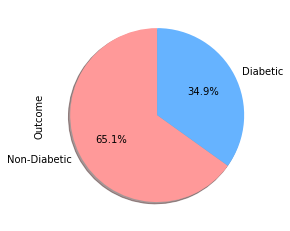

In [13]:
#Finding the percentage of Healthy and Diabetic people
labels= 'Non-Diabetic','Diabetic' 
#colors = ["orange", "green",'#99ff99','#ffcc99','#ff9999','#66b3ff]
colors = ['#ff9999','#66b3ff']
pima.Outcome.value_counts().plot.pie(labels = labels, colors = colors, autopct = '%1.1f%%',shadow = True,startangle =90)


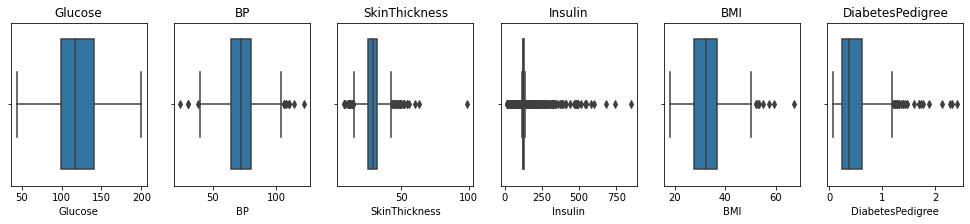

In [14]:
#Visualizing the outliers
fig = plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data =plt.subplot(1,7,i,title=pima.columns[i])
    sns.boxplot(pima[pima.columns[i]])
#The plot shows outliers present in the dataset. BP, SkinThickness, Insulin,BMI have outliers

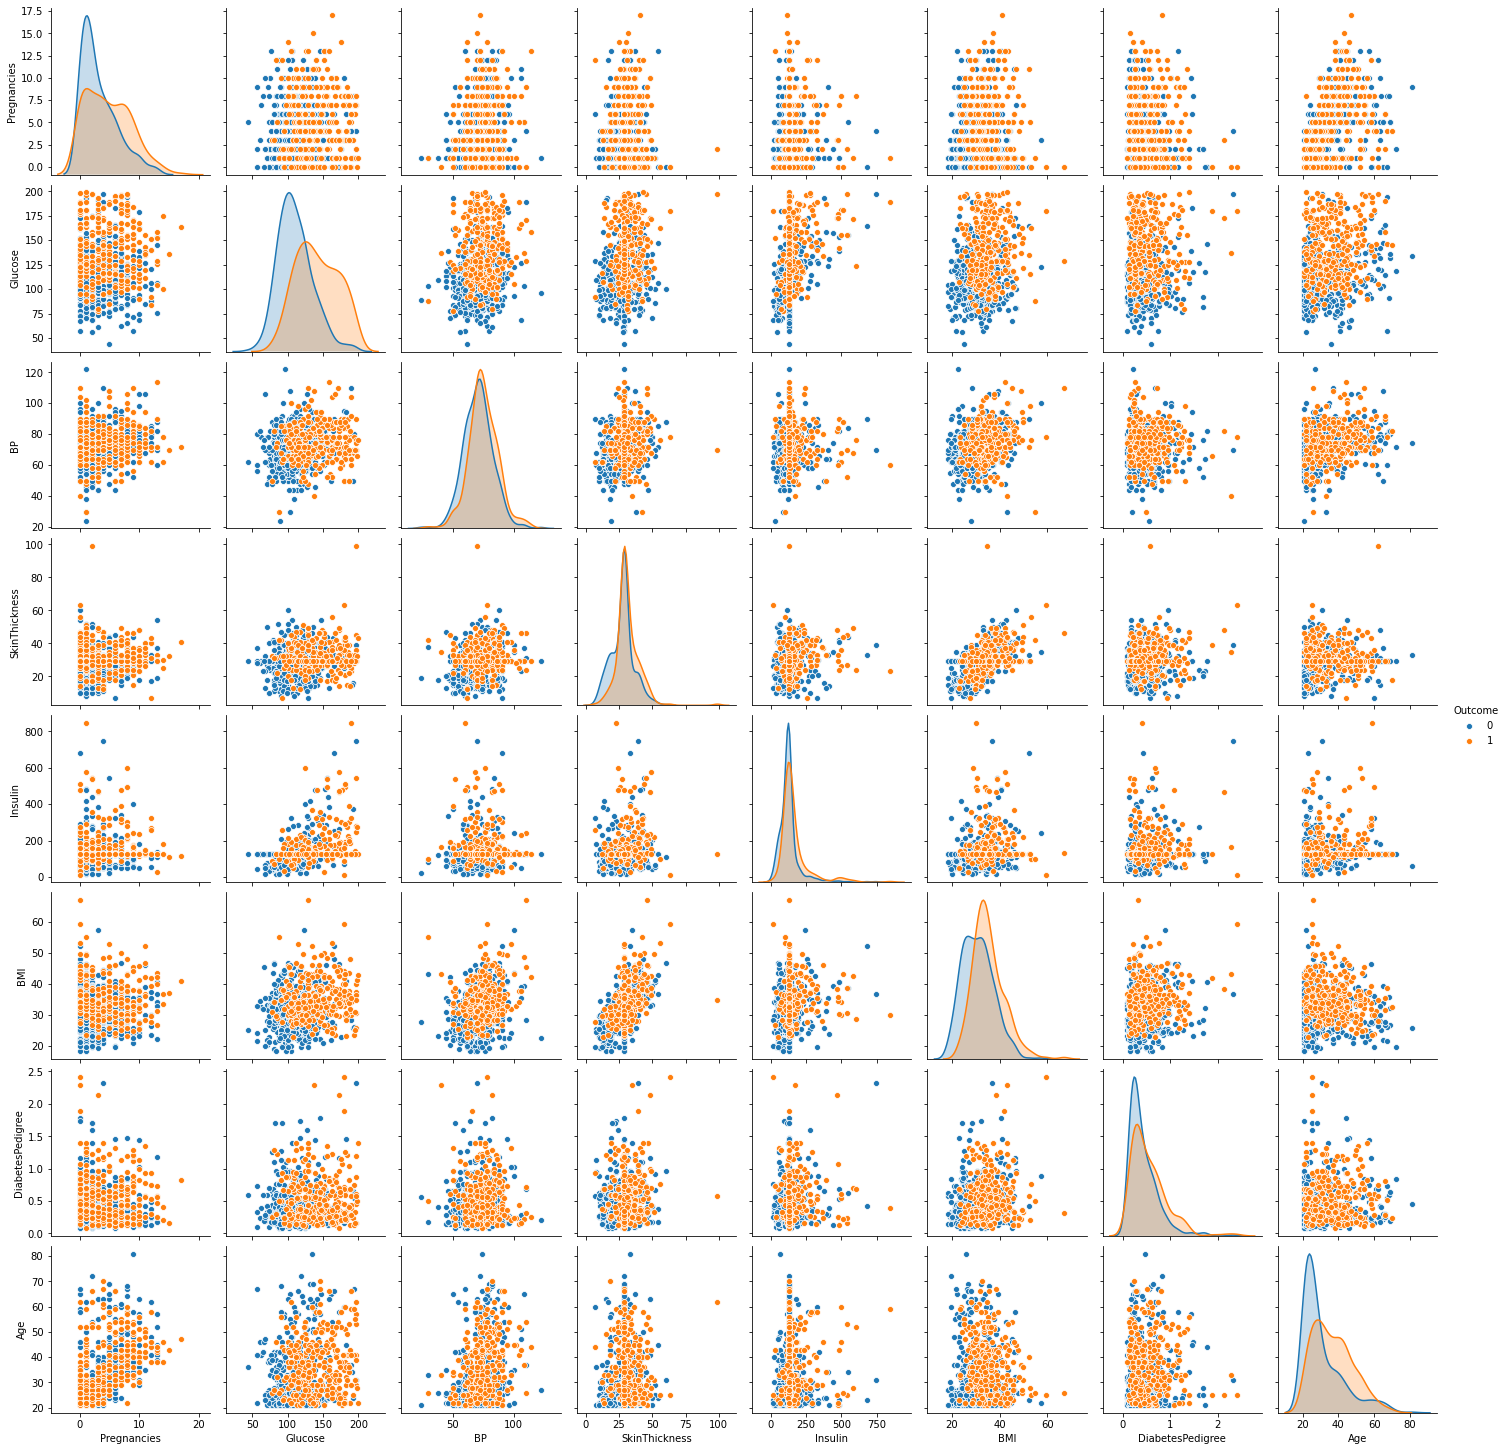

In [15]:
sns.pairplot(pima,hue='Outcome');

In [16]:
cor = pima.corr()
cor

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigree,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

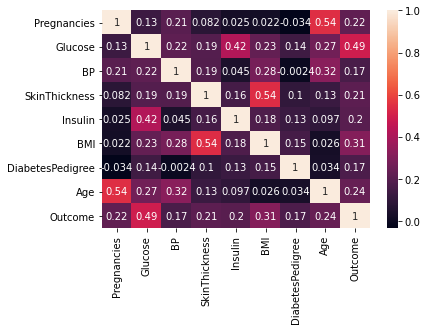

In [17]:
sns.heatmap(cor,annot=True)

In [18]:
#Analysis of 'Pregnancies' parameter
pd.crosstab(pima['Pregnancies'],pima['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

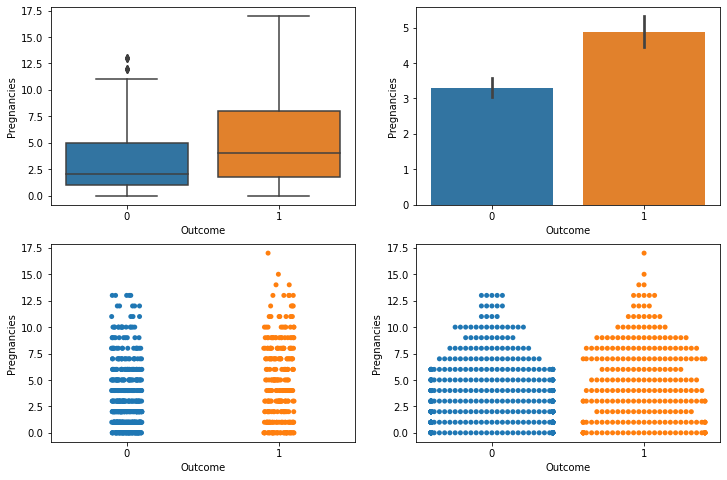

In [19]:
fig, ax2 = plt.subplots(2,2, figsize =(12,8))
sns.boxplot(x ="Outcome", y ="Pregnancies",data =pima, ax=ax2[0][0])
sns.barplot(pima['Outcome'], pima['Pregnancies'], ax=ax2[0][1])
sns.stripplot(pima['Outcome'], pima['Pregnancies'],jitter = True, ax=ax2[1][0])
sns.swarmplot(pima['Outcome'], pima['Pregnancies'], ax=ax2[1][1])


In [20]:
pd.crosstab(pima['Glucose'],pima['Outcome'])

Outcome,0,1
Glucose,,
44.0,1,0
56.0,1,0
57.0,2,0
61.0,1,0
62.0,1,0
...,...,...
195.0,0,2
196.0,0,3
197.0,1,3


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

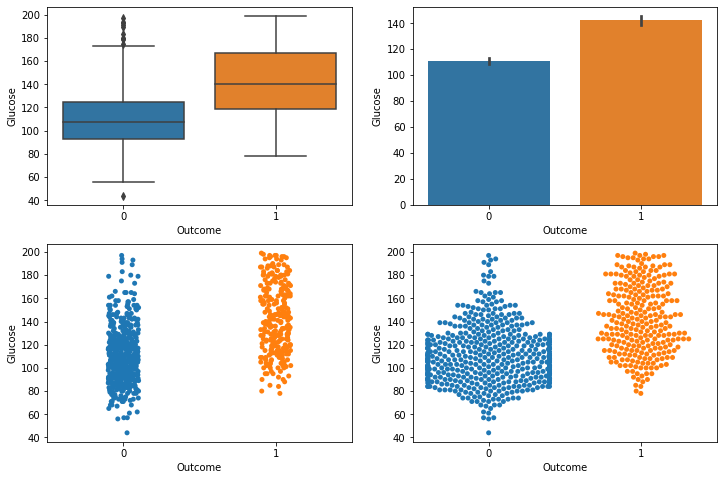

In [21]:
fig, ax2 = plt.subplots(2,2, figsize =(12,8))
sns.boxplot(x ="Outcome", y ="Glucose",data =pima, ax=ax2[0][0])
sns.barplot(pima['Outcome'], pima['Glucose'], ax=ax2[0][1])
sns.stripplot(pima['Outcome'], pima['Glucose'],jitter = True, ax=ax2[1][0])
sns.swarmplot(pima['Outcome'], pima['Glucose'], ax=ax2[1][1])


In [22]:
pd.crosstab(pima['Age'],pima['Outcome'])

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

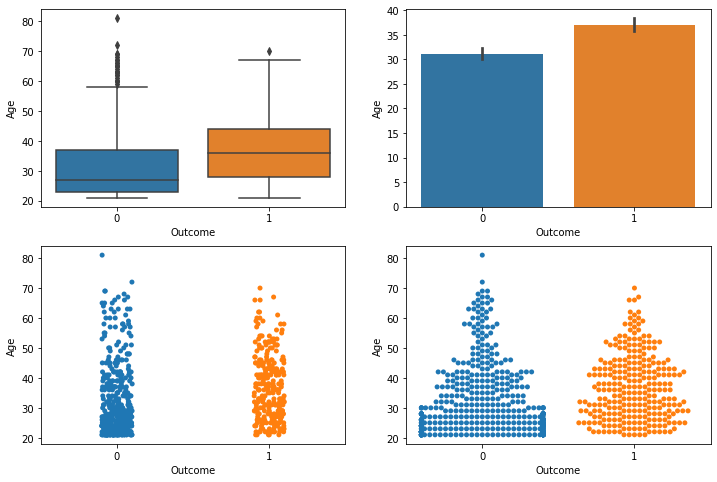

In [23]:
fig, ax2 = plt.subplots(2,2, figsize =(12,8))
sns.boxplot(x ="Outcome", y ="Age",data =pima, ax=ax2[0][0])
sns.barplot(pima['Outcome'], pima['Age'], ax=ax2[0][1])
sns.stripplot(pima['Outcome'], pima['Age'],jitter = True, ax=ax2[1][0])
sns.swarmplot(pima['Outcome'], pima['Age'], ax=ax2[1][1])


In [24]:
pd.crosstab(pima['BMI'],pima['Outcome'])

Outcome,0,1
BMI,,
18.2,3,0
18.4,1,0
19.1,1,0
19.3,1,0
19.4,1,0
...,...,...
53.2,0,1
55.0,0,1
57.3,1,0


<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

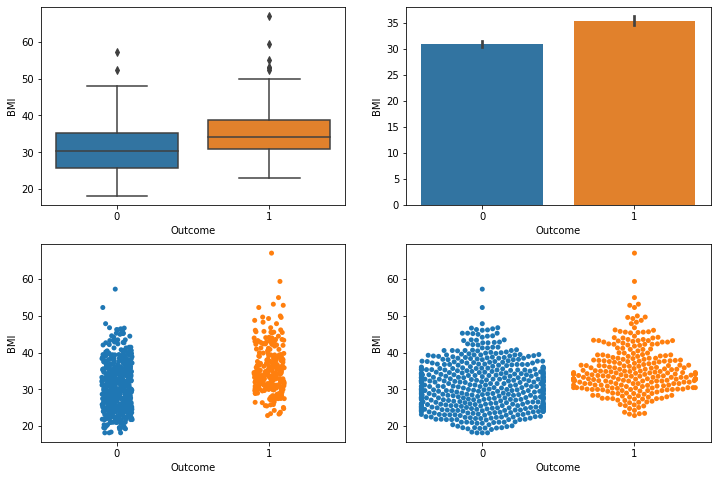

In [25]:
fig, ax2 = plt.subplots(2,2, figsize =(12,8))
sns.boxplot(x ="Outcome", y ="BMI",data =pima, ax=ax2[0][0])
sns.barplot(pima['Outcome'], pima['BMI'], ax=ax2[0][1])
sns.stripplot(pima['Outcome'], pima['BMI'],jitter = True, ax=ax2[1][0])
sns.swarmplot(pima['Outcome'], pima['BMI'], ax=ax2[1][1])

In [66]:
#Dataset Preparation (splitting and normalization)
#The data set consists of record of 767 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 17 records to cross check our model.
dfTrain = pima[:650]
dfTest = pima[650:767]


In [60]:
#separate the label and features (for both training and test dataset)
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [61]:
#As the final step before using machine learning, we will normalize our inputs. Normalize the data such that each variable has 0 mean and standard deviation of 1.
'''means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1'''

In [79]:
from sklearn import preprocessing
# normalize the data attributes
trainData = preprocessing.normalize(trainData)
testData = preprocessing.normalize(testData)
print("Normalized Data = ", trainData)
print("Normalized Data = ", testData)

Normalized Data =  [[ 0.32656852  0.43804329 -0.00646955 ...  0.09617827  0.21786079
   0.72407759]
 [-0.46374301 -0.6570504  -0.28909714 ... -0.45577555 -0.20901151
  -0.09754367]
 [ 0.43755806  0.70779083 -0.24072932 ... -0.45329567  0.19930737
  -0.03131938]
 ...
 [-0.34787436  0.58220572 -0.57517892 ...  0.24614162 -0.0213018
  -0.29120223]
 [ 0.77596608  0.17620587  0.36185448 ... -0.20741544 -0.23288904
   0.27779928]
 [-0.49302488 -0.20107496 -0.44721254 ... -0.36959255 -0.44358624
  -0.37533912]]
Normalized Data =  [[-0.32155945 -0.37989215 -0.59135697 -0.17007484 -0.17510834 -0.39414228
  -0.27790586 -0.33228035]
 [-0.50963258 -0.08214415 -0.62746674 -0.4061609  -0.23552993  0.1357618
  -0.02254403 -0.31690999]
 [ 0.21258084  0.03676369  0.09259626  0.7335403  -0.42601619  0.15766529
  -0.3666502  -0.25694721]
 [-0.28374198 -0.01919033 -0.81195176  0.00318641 -0.08883746 -0.41860519
  -0.03669645 -0.27454942]
 [-0.485777   -0.28797624 -0.10599159 -0.06160323 -0.03102813  0.163

In [80]:
#Training and Evaluating Machine Learning Model
#Logistic Regression
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [100]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  74.35897435897436 %


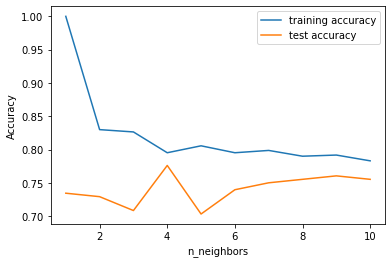

In [73]:
#k-Nearest Neighbors
#finding connection between model complexity and accuracy:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pima.loc[:, pima.columns != 'Outcome'], pima['Outcome'], stratify=pima['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [103]:
#The above plot suggests that we should choose n_neighbors=9.
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.76


In [75]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.729


In [36]:
#We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


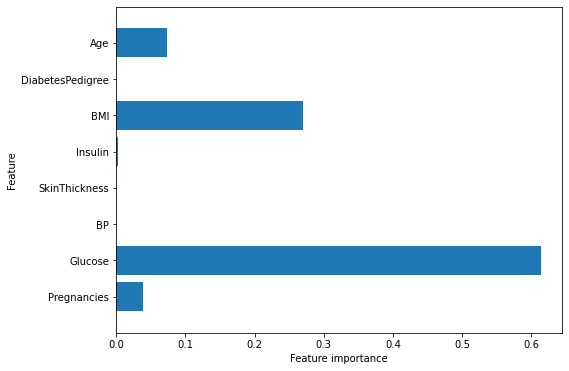

In [37]:
#Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”. 

pima_features = [x for i,x in enumerate(pima.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), pima_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.776


In [39]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.776


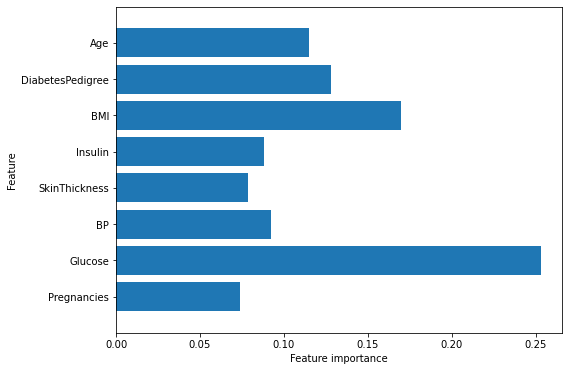

In [40]:
plot_feature_importances_diabetes(rf)